In [1]:
import os
import pandas as pd
import numpy as np
import json
import shutil
import datetime as dt
import openpyxl
from IPython.display import clear_output
from progress.bar import IncrementalBar
import ipywidgets
import ipywidgets as widgets
import time, sys
from IPython.display import clear_output
import scipy.special as sps
from scipy import *
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
mainpath = 'D:\\Michael\\Data\\Money movers\\Stats\\'
Name = input('Enter indicator name: ')
ID = mainpath + Name + '\\'
n = 0
for file in os.listdir(ID):
    if n == 0:
        IDfile1 = pd.read_csv(ID + file, usecols=['Profit'])
    else:
        IDfile2 = pd.read_csv(ID + file, usecols=['Profit'])
    n = 1


Enter indicator name: SMITREND


Sample X is normally distributed False
Sample Y is normally distributed False
The samples have equal variances False
The samples are statistically distinguishable. Mann-Whitney test


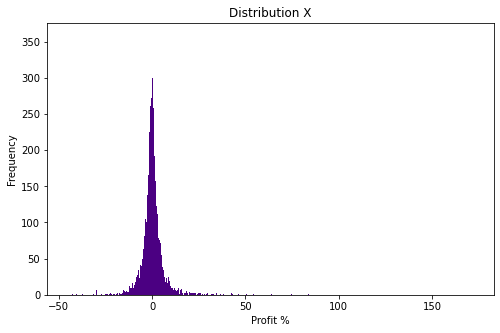

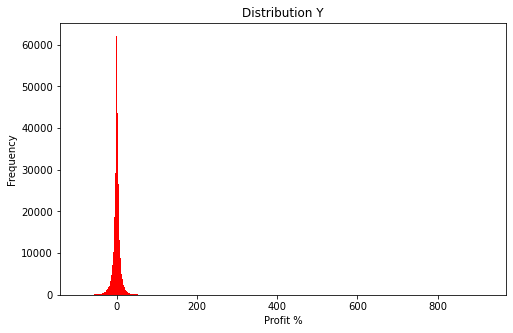

In [69]:
X_shapiro = stats.shapiro(IDfile1.Profit)
print(f'Sample X is normally distributed {X_shapiro[1] > 0.05}')
Y_shapiro = stats.shapiro(IDfile2.Profit)
print(f'Sample Y is normally distributed {Y_shapiro[1] > 0.05}')
plt.figure(figsize=(8, 5))
plt.hist(IDfile1, color='indigo', bins = 1000)
plt.xlabel('Profit %')
plt.ylabel('Frequency')
plt.title('Distribution X');
plt.figure(figsize=(8, 5))
plt.hist(IDfile2, color='red', bins = 1000)
plt.xlabel('Profit %')
plt.ylabel('Frequency')
plt.title('Distribution Y');
XY_leven = stats.levene(IDfile1.Profit, IDfile2.Profit)
print(f'The samples have equal variances {XY_leven[1] > 0.05}')

if X_shapiro[1] > 0.05 and Y_shapiro[1] > 0.05:
    if XY_leven > 0.05:
        XY_student = stats.ttest_ind(IDfile1.Profit, IDfile2.Profit, equal_var=True)
        if XY_student[1] > 0.05:
            print('The samples are statistically indistinguishable. Student test')
        else:
            print('The samples are statistically distinguishable. Student test')
    else:
        XY_welch = stats.ttest_ind(IDfile1.Profit, IDfile2.Profit, equal_var=False)

        if XY_welch[1] > 0.05:
            print('The samples are statistically indistinguishable. Welch test')
        else:
            print('The samples are statistically distinguishable. Welch test')
else:
    XY_mann_whitney = stats.mannwhitneyu(IDfile1.Profit, IDfile2.Profit)
    if XY_mann_whitney[1] > 0.05:
        print('The samples are statistically indistinguishable. Mann-Whitney test')
    else:
        print('The samples are statistically distinguishable. Mann-Whitney test')

In [66]:
m1 = IDfile1[IDfile1.Profit > 0].shape[0]
n1 = IDfile1.shape[0]
m2 = IDfile2[IDfile2.Profit > 0].shape[0]
n2 = IDfile2.shape[0]


In [70]:
T = (m2/n2 - m1/n1)/((m1 + m2)/(n1 + n2) * (1 - (m1 + m2)/(n1 + n2)) * (1/n1 + 1/n2))**0.5
P = 1 - stats.norm.cdf(T)
if P > 0.05:
    print('The indicator has not confirmed its effectiveness')
else:
    print('The indicator has confirmed its effectiveness')

The indicator has confirmed its effectiveness
